<h1>KLASTERISASI DAERAH TERDAMPAK BANJIR DI DKI JAKARTA TAHUN 2021</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memasukkan Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/01. Portofolio 3/gabungan.csv')
df

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0
1004,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,RW : 02,1,1,0,0,5 cm,12,0,0,0,0,0,0,0,0


Dataset yang digunakan berisi data kejadian banjir semua kelurahan di DKI Jakarta dalam satu tahun (Januari-Desember 2021).

# Pre-Processing Data

### Cek Data Duplikat

In [4]:
df.duplicated().sum()

90

Setelah dilakukan pengecekan, data memuat 90 data duplikat. Selanjutnya, data duplikat tersebut dihilangkan.

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(916, 18)

In [7]:
df.reset_index()

,index,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
912,1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
913,1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
914,1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


## Cek Missing Value

In [8]:
# Cek nilai Null
print(df.isna().sum())

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
ketinggian_air                0
tanggal_kejadian              0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
dtype: int64


Setelah dilakukan pengecekan, data tidak memuat nilai kosong.

## Menyesuaikan Format Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 1004
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           916 non-null    object
 1   kecamatan                   916 non-null    object
 2   kelurahan                   916 non-null    object
 3   rw                          916 non-null    object
 4   jumlah_terdampak_rw         916 non-null    int64 
 5   jumlah_terdampak_rt         916 non-null    int64 
 6   jumlah_terdampak_kk         916 non-null    object
 7   jumlah_terdampak_jiwa       916 non-null    int64 
 8   ketinggian_air              916 non-null    object
 9   tanggal_kejadian            916 non-null    int64 
 10  lama_genangan               916 non-null    int64 
 11  jumlah_meninggal            916 non-null    int64 
 12  jumlah_hilang               916 non-null    int64 
 13  jumlah_luka_berat           916 non-null    int64

Variabel `jumlah_terdampak_kk` memiliki tipe data object, di mana seharusnya bertipe integer sebab variabel ini menyatakan jumlah korban terdampak dalam satuan kepala keluarga (kk). Berikutnya, akan dilakukan penyesuaian tipe data untuk variabel `jumlah_terdampak_kk`.

In [10]:
df['jumlah_terdampak_kk'] = pd.to_numeric(df['jumlah_terdampak_kk'], errors='coerce').fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 1004
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           916 non-null    object
 1   kecamatan                   916 non-null    object
 2   kelurahan                   916 non-null    object
 3   rw                          916 non-null    object
 4   jumlah_terdampak_rw         916 non-null    int64 
 5   jumlah_terdampak_rt         916 non-null    int64 
 6   jumlah_terdampak_kk         916 non-null    int64 
 7   jumlah_terdampak_jiwa       916 non-null    int64 
 8   ketinggian_air              916 non-null    object
 9   tanggal_kejadian            916 non-null    int64 
 10  lama_genangan               916 non-null    int64 
 11  jumlah_meninggal            916 non-null    int64 
 12  jumlah_hilang               916 non-null    int64 
 13  jumlah_luka_berat           916 non-null    int64

## Mengecek Kesalahan Penulisan Kata

### Data Kelurahan

In [11]:
# Data Kelurahan
df["kelurahan"].unique()

array(['JOHAR BARU', 'GUNUNG SAHARI SELATAN', 'SERDANG', 'PASAR BARU',
       'BENDUNGAN HILIR', 'KARET TENGSIN', 'PETAMBURAN', 'CILINCING',
       'MARUNDA', 'ROROTAN', 'SEMPER BARAT', 'SEMPER TIMUR', 'SUKA PURA',
       'KELAPA GADING BARAT', 'KELAPA GADING TIMUR', 'PEGANGSAAN DUA',
       'TUGU SELATAN', 'KAPUK MUARA', 'PEJAGALAN', 'PENJARINGAN', 'PLUIT',
       'ANCOL', 'CENGKARENG BARAT', 'CENGKARENG TIMUR', 'DURI KOSAMBI',
       'KAPUK', 'KEDAUNG KALI ANGKE', 'RAWA BUAYA', 'JELAMBAR BARU',
       'TANJUNG DUREN UTARA', 'TOMANG', 'WIJAYA KUSUMA', 'KALIDERES',
       'KAMAL', 'PEGADUNGAN', 'SEMANAN', 'TEGAL ALUR', 'DURI KEPA',
       'KEDOYA SELATAN', 'KEDOYA UTARA', 'SUKABUMI UTARA',
       'SUKABUMI SELATAN', 'KELAPA DUA ', 'JOGLO', 'KEMBANGAN SELATAN',
       'KEMBANGAN UTARA', 'MERUYA SELATAN', 'MERUYA UTARA', 'SRENGSENG',
       'JATI PULO', 'KEMANGGISAN', 'KOTA BAMBU SELATAN',
       'KOTA BAMBU UTARA', 'PALMERAH', 'SLIPI', 'CILANDAK BARAT',
       'CIPETE SELATAN', 'LEBAK B

Dari hasil pengecekan di atas, terdapat kesalahan penulisan nama kelurahan, yaitu kelurahan "BALE KAMBANG" seharusnya ditulis sebagai "BALEKAMBANG". Selain itu, terdapat pula nama kelurahan yang ditulis "0", data ini selanjutnya dihilangkan.

In [12]:
df.loc[df['kelurahan'] == 'BALE KAMBANG', 'kelurahan'] = 'BALEKAMBANG'

In [13]:
indeks = df.loc[df['kelurahan'] == "0"].index
df.drop(indeks, inplace=True)

In [14]:
df["kelurahan"].unique()

array(['JOHAR BARU', 'GUNUNG SAHARI SELATAN', 'SERDANG', 'PASAR BARU',
       'BENDUNGAN HILIR', 'KARET TENGSIN', 'PETAMBURAN', 'CILINCING',
       'MARUNDA', 'ROROTAN', 'SEMPER BARAT', 'SEMPER TIMUR', 'SUKA PURA',
       'KELAPA GADING BARAT', 'KELAPA GADING TIMUR', 'PEGANGSAAN DUA',
       'TUGU SELATAN', 'KAPUK MUARA', 'PEJAGALAN', 'PENJARINGAN', 'PLUIT',
       'ANCOL', 'CENGKARENG BARAT', 'CENGKARENG TIMUR', 'DURI KOSAMBI',
       'KAPUK', 'KEDAUNG KALI ANGKE', 'RAWA BUAYA', 'JELAMBAR BARU',
       'TANJUNG DUREN UTARA', 'TOMANG', 'WIJAYA KUSUMA', 'KALIDERES',
       'KAMAL', 'PEGADUNGAN', 'SEMANAN', 'TEGAL ALUR', 'DURI KEPA',
       'KEDOYA SELATAN', 'KEDOYA UTARA', 'SUKABUMI UTARA',
       'SUKABUMI SELATAN', 'KELAPA DUA ', 'JOGLO', 'KEMBANGAN SELATAN',
       'KEMBANGAN UTARA', 'MERUYA SELATAN', 'MERUYA UTARA', 'SRENGSENG',
       'JATI PULO', 'KEMANGGISAN', 'KOTA BAMBU SELATAN',
       'KOTA BAMBU UTARA', 'PALMERAH', 'SLIPI', 'CILANDAK BARAT',
       'CIPETE SELATAN', 'LEBAK B

### Data Kecamatan

In [15]:
# Data Kecamatan
df["kecamatan"].unique()

array(['JOHAR BARU', 'KEMAYORAN', 'SAWAH BESAR', 'TANAH ABANG',
       'CILINCING', 'KELAPA GADING', 'KOJA', 'PENJARINGAN', 'PADEMANGAN',
       'CENGKARENG', 'GROGOL PETAMBURAN', 'KALIDERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'CILANDAK', 'JAGAKARSA', 'KEBAYORAN BARU',
       'KEBAYORAN LAMA', 'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU',
       'PESANGGRAHAN', 'SETIABUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG',
       'CIRACAS', 'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR',
       'MATRAMAN', 'PASAR REBO', 'PULOGADUNG', 'SENEN', 'MENTENG',
       'CEMPAKA PUTIH', 'GAMBIR', 'TANJUNG PRIOK', 'CILIINCING',
       'TAMAN SARI', 'TAMBORA', 'KEPULAUAN SERIBU SELATAN',
       'KEPULAUAN SERIBU UTARA', 'PULO GADUNG', 'MAMPANG'], dtype=object)

Beberapa kesalahan penulisan pada data kecamatan, antara lain penulisan "CILIINCING", "PULOGADUNG", dan "MAMPANG". Selanjutnya, akan dilakukan penyesuaian terhadap data-data tersebut.

In [16]:
df.loc[df['kecamatan'] == 'CILIINCING', 'kecamatan'] = 'CILINCING'
df.loc[df['kecamatan'] == 'PULOGADUNG', 'kecamatan'] = 'PULO GADUNG'
df.loc[df['kecamatan'] == 'MAMPANG', 'kecamatan'] = 'MAMPANG PRAPATAN'

df['kecamatan'].unique()

array(['JOHAR BARU', 'KEMAYORAN', 'SAWAH BESAR', 'TANAH ABANG',
       'CILINCING', 'KELAPA GADING', 'KOJA', 'PENJARINGAN', 'PADEMANGAN',
       'CENGKARENG', 'GROGOL PETAMBURAN', 'KALIDERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'CILANDAK', 'JAGAKARSA', 'KEBAYORAN BARU',
       'KEBAYORAN LAMA', 'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU',
       'PESANGGRAHAN', 'SETIABUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG',
       'CIRACAS', 'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR',
       'MATRAMAN', 'PASAR REBO', 'PULO GADUNG', 'SENEN', 'MENTENG',
       'CEMPAKA PUTIH', 'GAMBIR', 'TANJUNG PRIOK', 'TAMAN SARI',
       'TAMBORA', 'KEPULAUAN SERIBU SELATAN', 'KEPULAUAN SERIBU UTARA'],
      dtype=object)

### Kota Administrasi

In [17]:
# Data Kota Administrasi
df["kota_administrasi"].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu',
       'Jakarta Urata'], dtype=object)

Kesalahan penulisan terdapat pada penulisan "Jakarta Urata" yang seharunya ditulis sebagai "Jakarta Utara".

In [18]:
df.loc[df['kota_administrasi'] == 'Jakarta Urata', 'kota_administrasi'] = 'Jakarta Utara'
df['kota_administrasi'].unique()

array(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Timur', 'Kepulauan Seribu'],
      dtype=object)

# EDA (Sebelum di-aggregate)

In [19]:
df.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.0,915.0,915.0,915.000000,915.000000,915.000000,915.0
mean,2.038251,3.632787,46.344262,165.316940,6.297268,0.020765,0.0,0.0,0.0,98.638251,1.455738,0.013115,0.0
std,2.390184,5.561533,206.924934,711.910608,4.119275,0.157266,0.0,0.0,0.0,375.279419,11.144611,0.147342,0.0
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,3.000000,4.000000,8.000000,27.500000,10.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,15.000000,46.000000,3762.000000,13450.000000,12.000000,2.000000,0.0,0.0,0.0,4461.000000,271.000000,3.000000,0.0


In [20]:
df.describe(include='object')

,kota_administrasi,kecamatan,kelurahan,rw,ketinggian_air
count,915,915,915,915,915
unique,6,44,218,356,183
top,Jakarta Timur,JATINEGARA,KAMPUNG MELAYU,0,20 cm
freq,342,84,57,180,64


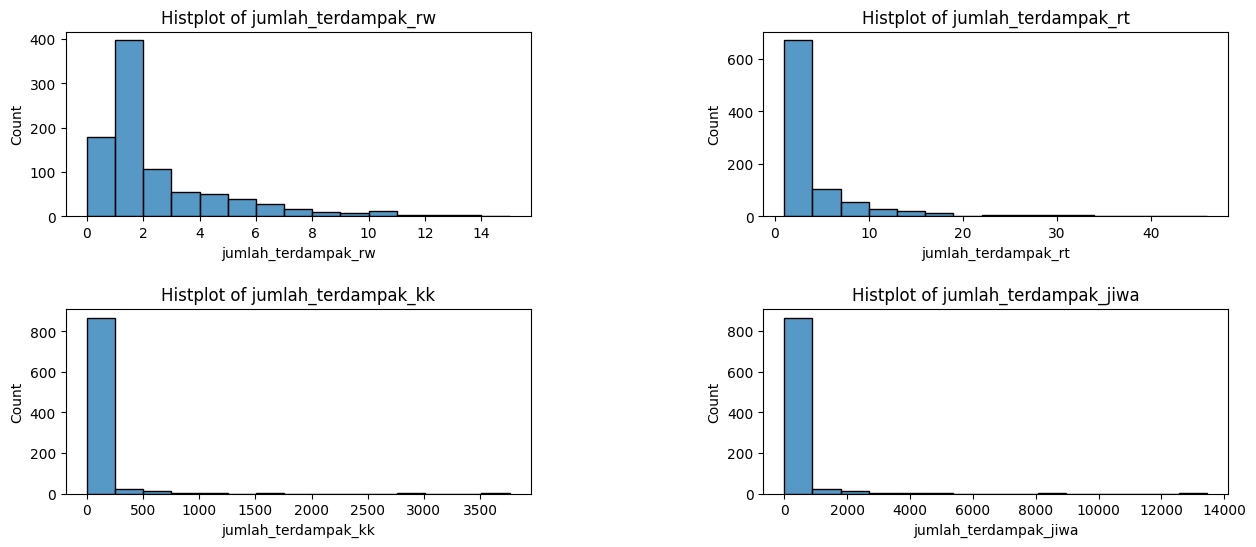

In [21]:
# grafik distribusi variabel prediktor
plt.figure(1 , figsize = (15 , 6))
graph = 0
# for loop
for x in ['jumlah_terdampak_rw' , 'jumlah_terdampak_rt' , 'jumlah_terdampak_kk', 'jumlah_terdampak_jiwa']:
    graph += 1

    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 15)
    plt.title('Histplot of {}'.format(x))
# showing the graph
plt.show()

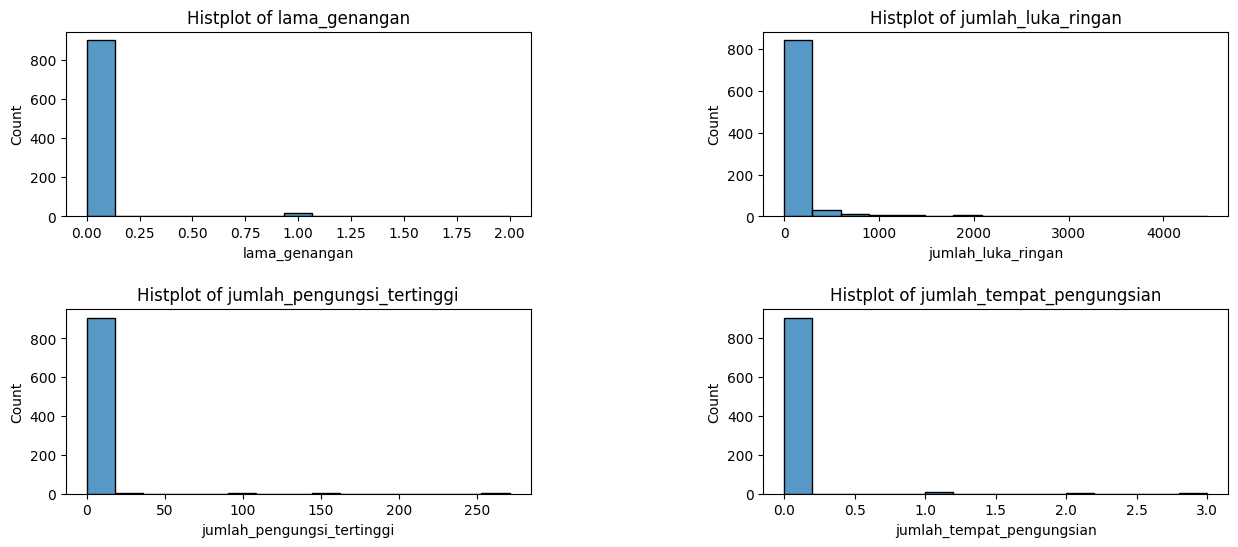

In [22]:
plt.figure(1 , figsize = (15 , 6))
graph = 0
# for loop
for x in ['lama_genangan', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi', 'jumlah_tempat_pengungsian']:
    graph += 1

    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 15)
    plt.title('Histplot of {}'.format(x))
# showing the graph
plt.show()

In [23]:
df = df.reset_index()
df

,index,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,1,0,0,0,0,140,1,0,0
1,1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,1,0,0,0,0,0,0,0,0
2,2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,1,1,0,0,0,0,0,0,0
3,3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,1,0,0,0,0,625,5,0,0
4,4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,1,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1000,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 10 cm,12,0,0,0,0,0,0,0,0
911,1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12,0,0,0,0,0,0,0,0
912,1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12,0,0,0,0,0,0,0,0
913,1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12,0,0,0,0,0,0,0,0


# Agregasi Data

Pada projek ini, yang dijadikan objek klasterisasi adalah kecamatan-kecamatan yang ada di DKI Jakarta. Oleh karena dataset yang digunakan memberikan informasi kejadian banjir di tingkat kelurahan, maka perlu dilakukan agregasi data menjadi tingkat kecamatan. Kemudian, oleh karena tujuan dari klasterisasi pada projek ini adalah mengelompokkan tingkat dampak banjir, maka variabel yang digunakan antara lain `jumlah_terdampak_rw`, `jumlah_terdampak_rt`, `jumlah_terdampak_kk`, dan `jumlah_terdampak_jiwa`.

## Agregasi Data Berdasarkan Kelurahan

In [24]:
# Mengambil nilai dari variabel yang digunakan
data1 = df[["kelurahan", "jumlah_terdampak_rw", "jumlah_terdampak_rt", "jumlah_terdampak_kk", "jumlah_terdampak_jiwa"]]
data1

,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,JOHAR BARU,4,4,35,140
1,GUNUNG SAHARI SELATAN,4,4,0,0
2,SERDANG,4,4,0,0
3,PASAR BARU,7,7,155,625
4,BENDUNGAN HILIR,2,2,52,195
...,...,...,...,...,...
910,PULAU HARAPAN,0,1,0,0
911,PULAU HARAPAN,0,1,0,0
912,PULAU HARAPAN,0,1,0,0
913,PULAU HARAPAN,0,1,0,0


In [25]:
# Agregasi data kelurahan dengan mengambil jumlah terdampak maksimum dalam satu tahun
data_merged_kel = data1.groupby('kelurahan').max().reset_index()
data_merged_kel

,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,ANCOL,4,4,50,200
1,BALEKAMBANG,3,8,60,244
2,BAMBU APUS,4,9,12,48
3,BANGKA,4,6,260,1041
4,BATU AMPAR,6,15,6,24
...,...,...,...,...,...
213,ULUJAMI,5,5,80,321
214,UTAN KAYU SELATAN,5,5,0,0
215,UTAN KAYU UTARA,2,2,0,0
216,WARAKAS,3,3,0,0


In [26]:
data_merged_kel.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
count,218.000000,218.000000,218.000000,218.000000
mean,4.325688,7.885321,142.564220,513.697248
std,3.092935,8.453214,381.299655,1303.277336
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000
50%,4.000000,5.000000,20.500000,62.500000
75%,6.000000,10.000000,104.500000,396.750000
max,15.000000,46.000000,3762.000000,13450.000000


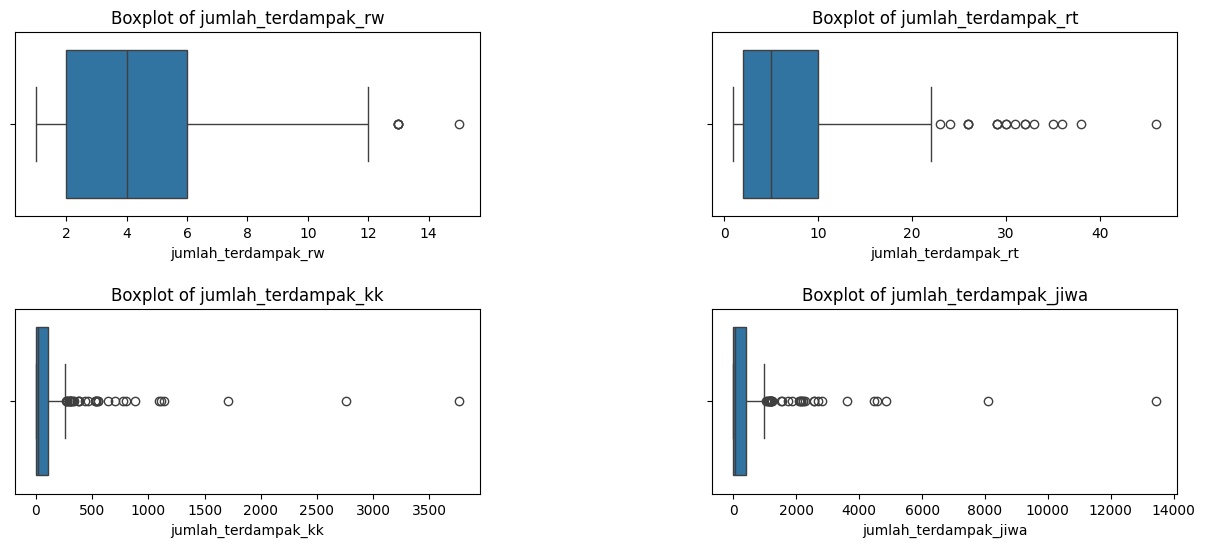

In [27]:
# grafik boxplot variabel prediktor
plt.figure(1 , figsize = (15 , 6))
graph = 0
# for loop
for x in ['jumlah_terdampak_rw' , 'jumlah_terdampak_rt' , 'jumlah_terdampak_kk', 'jumlah_terdampak_jiwa']:
    graph += 1

    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(data_merged_kel[x] , orient="h")
    plt.title('Boxplot of {}'.format(x))
# showing the graph
plt.show()

## Agregasi Data Berdasarkan Kecamatan

In [28]:
# Mengambil nilai dari variabel kecamatan dan kelurahan pada dataset awal
data_kec_kel = df[["kecamatan", "kelurahan"]]
data_kec_kel

,kecamatan,kelurahan
0,JOHAR BARU,JOHAR BARU
1,KEMAYORAN,GUNUNG SAHARI SELATAN
2,KEMAYORAN,SERDANG
3,SAWAH BESAR,PASAR BARU
4,TANAH ABANG,BENDUNGAN HILIR
...,...,...
910,KEPULAUAN SERIBU UTARA,PULAU HARAPAN
911,KEPULAUAN SERIBU UTARA,PULAU HARAPAN
912,KEPULAUAN SERIBU UTARA,PULAU HARAPAN
913,KEPULAUAN SERIBU UTARA,PULAU HARAPAN


In [29]:
# Menambahkan nama kecamatan pada dataset data_merged_kel
data2 = pd.merge(data_kec_kel, data_merged_kel)
data2.drop_duplicates(inplace=True)
data2

,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,JOHAR BARU,JOHAR BARU,4,4,35,140
3,KEMAYORAN,GUNUNG SAHARI SELATAN,4,4,0,0
5,KEMAYORAN,SERDANG,4,4,0,0
7,SAWAH BESAR,PASAR BARU,7,7,155,625
9,TANAH ABANG,BENDUNGAN HILIR,5,12,52,195
...,...,...,...,...,...,...
905,TAMAN SARI,PINANGSIA,1,1,0,0
906,SENEN,PASEBAN,1,1,0,0
907,TAMBORA,KRENDANG,1,2,0,0
908,PULO GADUNG,PULO GADUNG,1,1,0,0


In [30]:
# Menghapus kolom kelurahan
data3 = data2[["kecamatan", "jumlah_terdampak_rw", "jumlah_terdampak_rt", "jumlah_terdampak_kk", "jumlah_terdampak_jiwa"]]
data3

,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,JOHAR BARU,4,4,35,140
3,KEMAYORAN,4,4,0,0
5,KEMAYORAN,4,4,0,0
7,SAWAH BESAR,7,7,155,625
9,TANAH ABANG,5,12,52,195
...,...,...,...,...,...
905,TAMAN SARI,1,1,0,0
906,SENEN,1,1,0,0
907,TAMBORA,1,2,0,0
908,PULO GADUNG,1,1,0,0


In [31]:
# Agregasi data berdasarkan kecamatan dengan mengakumulasikan jumlah terdampak
data_merged_kec = data3.groupby('kecamatan').sum().reset_index()

data_merged_kec

,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,CAKUNG,40,72,1189,4292
1,CEMPAKA PUTIH,8,9,0,0
2,CENGKARENG,63,111,3296,13210
3,CILANDAK,13,15,147,590
4,CILINCING,47,81,1315,4380
5,CIPAYUNG,25,47,125,375
6,CIRACAS,19,52,1386,4589
7,DUREN SAWIT,42,110,718,3316
8,GAMBIR,1,1,0,0
9,GROGOL PETAMBURAN,32,34,94,377


# Pengubahan Data ke dalam Bentuk Proporsi

Setelah dilakukan agregasi, diperoleh data jumlah korban terdampak dalam tingkat rw, rt, kk, dan jiwa di setiap kecamatan. Oleh karena setiap kecamatan di DKI Jakarta memiliki kepadatan penduduk yang berbeda-beda, maka variabel jumlah korban terdampak memiliki makna yang berbeda-beda di tiap kecamatan. Dengan demikian, perlu dilakukan transformasi variabel yang semula menggunakan jumlah korban terdampak menjadi proporsi korban terdampak di setiap kecamatan.

## Input Data Total

In [32]:
# Input Data Total RW, RT, KK, dan Jiwa
data_total = pd.read_excel("/content/drive/MyDrive/01. Portofolio 3/Data Jumlah Total.xlsx")
data_total

,Kecamatan,Total Penduduk,Total KK,Total RT,Total RW
0,Cakung,556515,139129,1032,90
1,Cempaka Putih,102079,25520,366,30
2,Cengkareng,576351,144088,1060,87
3,Cilandak,225122,56281,470,46
4,Cilincing,404766,101192,1036,89
5,Cipayung,283657,70914,508,56
6,Ciracas,331957,82989,609,49
7,Duren Sawit,430284,107571,1105,96
8,Gambir,104946,26237,462,43
9,Grogol Petamburan,253881,63470,878,75


In [33]:
# Menghilangkan Kolom Kecamatan
data_total = data_total.drop(["Kecamatan"], axis=1)
data_total

,Total Penduduk,Total KK,Total RT,Total RW
0,556515,139129,1032,90
1,102079,25520,366,30
2,576351,144088,1060,87
3,225122,56281,470,46
4,404766,101192,1036,89
5,283657,70914,508,56
6,331957,82989,609,49
7,430284,107571,1105,96
8,104946,26237,462,43
9,253881,63470,878,75


In [34]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Total Penduduk  44 non-null     int64
 1   Total KK        44 non-null     int64
 2   Total RT        44 non-null     int64
 3   Total RW        44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


## Penggabungan DataFrame

In [35]:
data_gabungan = pd.concat([data_merged_kec, data_total], axis=1)
data_gabungan.head()

,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,Total Penduduk,Total KK,Total RT,Total RW
0,CAKUNG,40,72,1189,4292,556515,139129,1032,90
1,CEMPAKA PUTIH,8,9,0,0,102079,25520,366,30
2,CENGKARENG,63,111,3296,13210,576351,144088,1060,87
3,CILANDAK,13,15,147,590,225122,56281,470,46
4,CILINCING,47,81,1315,4380,404766,101192,1036,89


## Penghitungan Proporsi

In [36]:
data_gabungan["proporsi_terdampak_rw"] = data_gabungan["jumlah_terdampak_rw"]/data_gabungan["Total RW"]
data_gabungan["proporsi_terdampak_rt"] = data_gabungan["jumlah_terdampak_rt"]/data_gabungan["Total RT"]
data_gabungan["proporsi_terdampak_kk"] = data_gabungan["jumlah_terdampak_kk"]/data_gabungan["Total KK"]
data_gabungan["proporsi_terdampak_jiwa"] = data_gabungan["jumlah_terdampak_jiwa"]/data_gabungan["Total Penduduk"]
data_gabungan.head()

,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,Total Penduduk,Total KK,Total RT,Total RW,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
0,CAKUNG,40,72,1189,4292,556515,139129,1032,90,0.444444,0.069767,0.008546,0.007712
1,CEMPAKA PUTIH,8,9,0,0,102079,25520,366,30,0.266667,0.024590,0.000000,0.000000
2,CENGKARENG,63,111,3296,13210,576351,144088,1060,87,0.724138,0.104717,0.022875,0.022920
3,CILANDAK,13,15,147,590,225122,56281,470,46,0.282609,0.031915,0.002612,0.002621
4,CILINCING,47,81,1315,4380,404766,101192,1036,89,0.528090,0.078185,0.012995,0.010821


In [37]:
data_final = data_gabungan[["kecamatan","proporsi_terdampak_rw", "proporsi_terdampak_rt", "proporsi_terdampak_kk", "proporsi_terdampak_jiwa"]]
data_final

,kecamatan,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
0,CAKUNG,0.444444,0.069767,0.008546,0.007712
1,CEMPAKA PUTIH,0.266667,0.024590,0.000000,0.000000
2,CENGKARENG,0.724138,0.104717,0.022875,0.022920
3,CILANDAK,0.282609,0.031915,0.002612,0.002621
4,CILINCING,0.528090,0.078185,0.012995,0.010821
5,CIPAYUNG,0.446429,0.092520,0.001763,0.001322
6,CIRACAS,0.387755,0.085386,0.016701,0.013824
7,DUREN SAWIT,0.437500,0.099548,0.006675,0.007707
8,GAMBIR,0.023256,0.002165,0.000000,0.000000
9,GROGOL PETAMBURAN,0.426667,0.038724,0.001481,0.001485


# EDA (Setelah di-aggregate dan diubah ke dalam proporsi)

## Statistik Deskriptif

In [38]:
data_final.describe()

,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
count,44.000000,44.000000,44.000000,44.000000
mean,0.357170,0.062836,0.009818,0.008946
std,0.206405,0.063572,0.016793,0.014769
min,0.020833,0.002165,0.000000,0.000000
25%,0.227551,0.026790,0.000331,0.000480
50%,0.303389,0.040091,0.004177,0.004025
75%,0.444940,0.085981,0.009256,0.008857
max,1.000000,0.373333,0.087050,0.079230


## Histogram

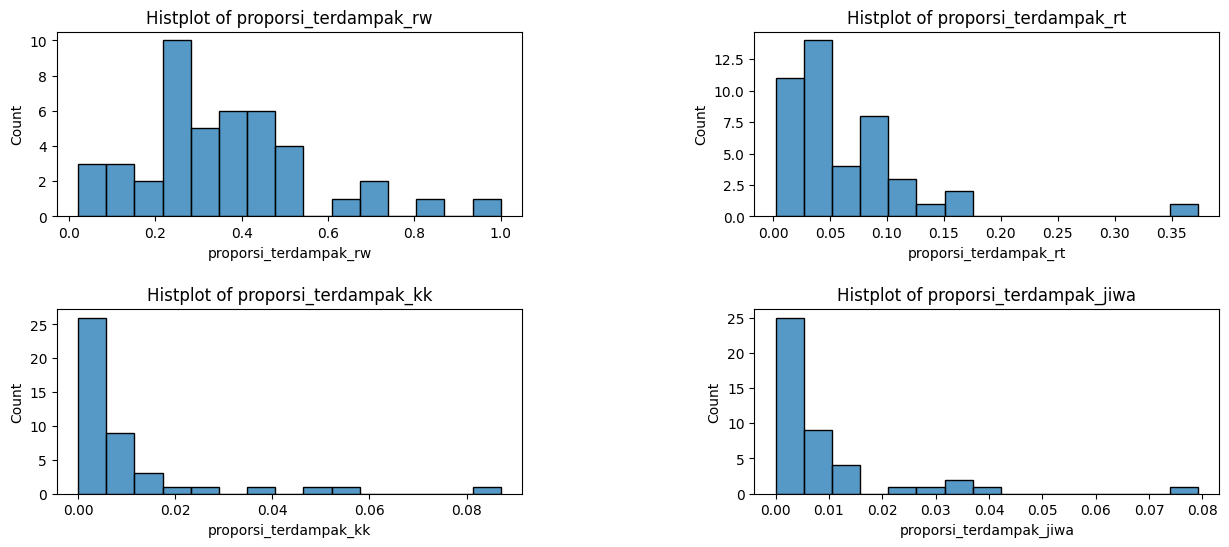

In [39]:
# grafik distribusi variabel prediktor
plt.figure(1 , figsize = (15 , 6))
graph = 0
# for loop
for x in ['proporsi_terdampak_rw' , 'proporsi_terdampak_rt' , 'proporsi_terdampak_kk', 'proporsi_terdampak_jiwa']:
    graph += 1

    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(data_final[x] , bins = 15)
    plt.title('Histplot of {}'.format(x))
# showing the graph
plt.show()

## Boxplot

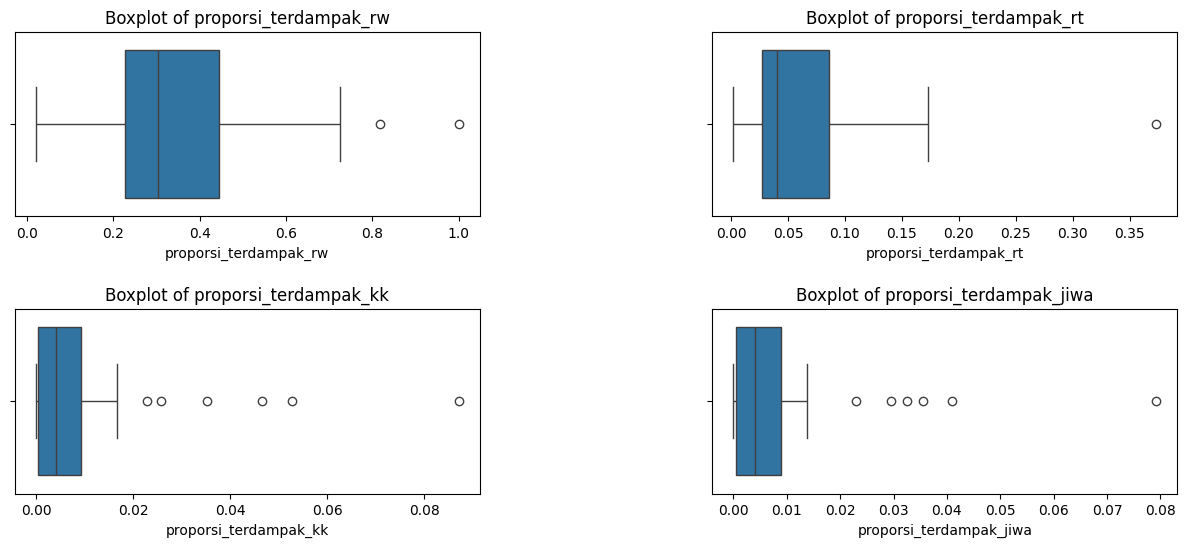

In [40]:
# grafik boxplot variabel prediktor
plt.figure(1 , figsize = (15 , 6))
graph = 0
# for loop
for x in ['proporsi_terdampak_rw' , 'proporsi_terdampak_rt' , 'proporsi_terdampak_kk', 'proporsi_terdampak_jiwa']:
    graph += 1

    # ploting graph
    plt.subplot(2 , 2 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(data_final[x], orient="h")
    plt.title('Boxplot of {}'.format(x))
# showing the graph
plt.show()

## Eksplorasi Lebih

<ipython-input-41-b4cbade215b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporsi_rw_5["proporsi_terdampak_rw"] = proporsi_rw_5["proporsi_terdampak_rw"].round(decimals=3)


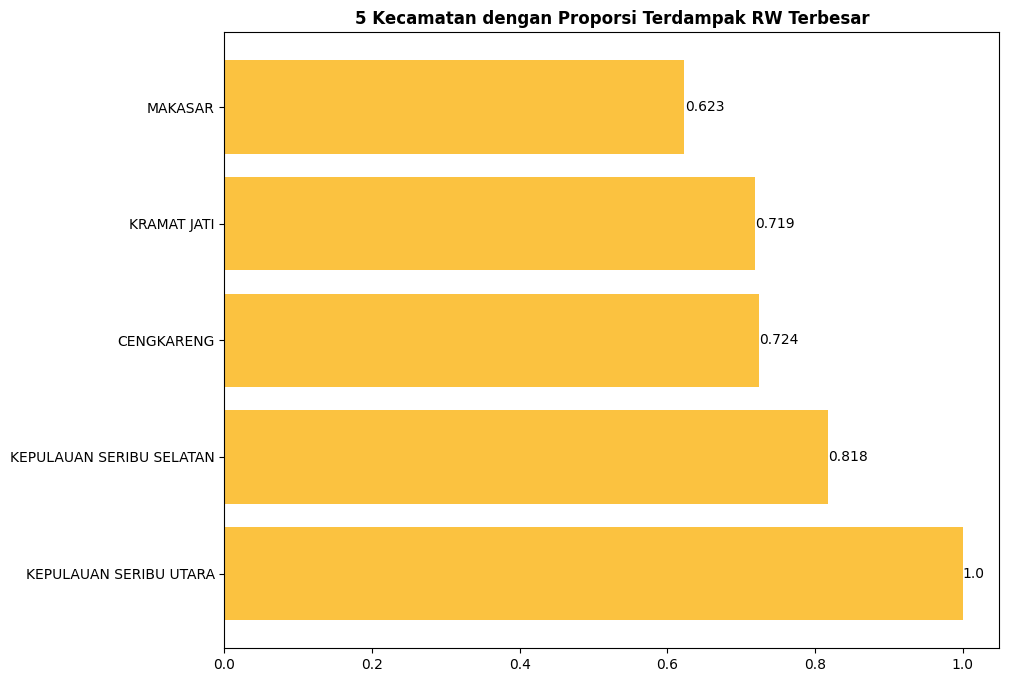

In [41]:
#Barplot Proporsi Terdampak RW
proporsi_rw = data_final[["kecamatan", "proporsi_terdampak_rw"]]

# Mengurutkan kecamatan berdasarkan proporsi terdampak rw secara menurun
proporsi_rw = proporsi_rw.sort_values('proporsi_terdampak_rw', ascending=False)
proporsi_rw_5 = proporsi_rw.iloc[:5,]
proporsi_rw_5["proporsi_terdampak_rw"] = proporsi_rw_5["proporsi_terdampak_rw"].round(decimals=3)

# Membuat visualisasi barh
plt.figure(figsize=(10, 8))  # Ukuran plot

# Menggambar barh untuk tiap kecamatan
plt.barh(proporsi_rw_5['kecamatan'], proporsi_rw_5['proporsi_terdampak_rw'], color="#FBC240")
plt.title("5 Kecamatan dengan Proporsi Terdampak RW Terbesar", fontweight="bold")

# Menambahkan label nilai di atas setiap barh
for i, v in enumerate(proporsi_rw_5['proporsi_terdampak_rw']):
    plt.text(v + 0.0005, i, str(v), ha='left', va='center')

<ipython-input-42-a1fc91917e15>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporsi_rt_5["proporsi_terdampak_rt"] = proporsi_rt_5["proporsi_terdampak_rt"].round(decimals=3)


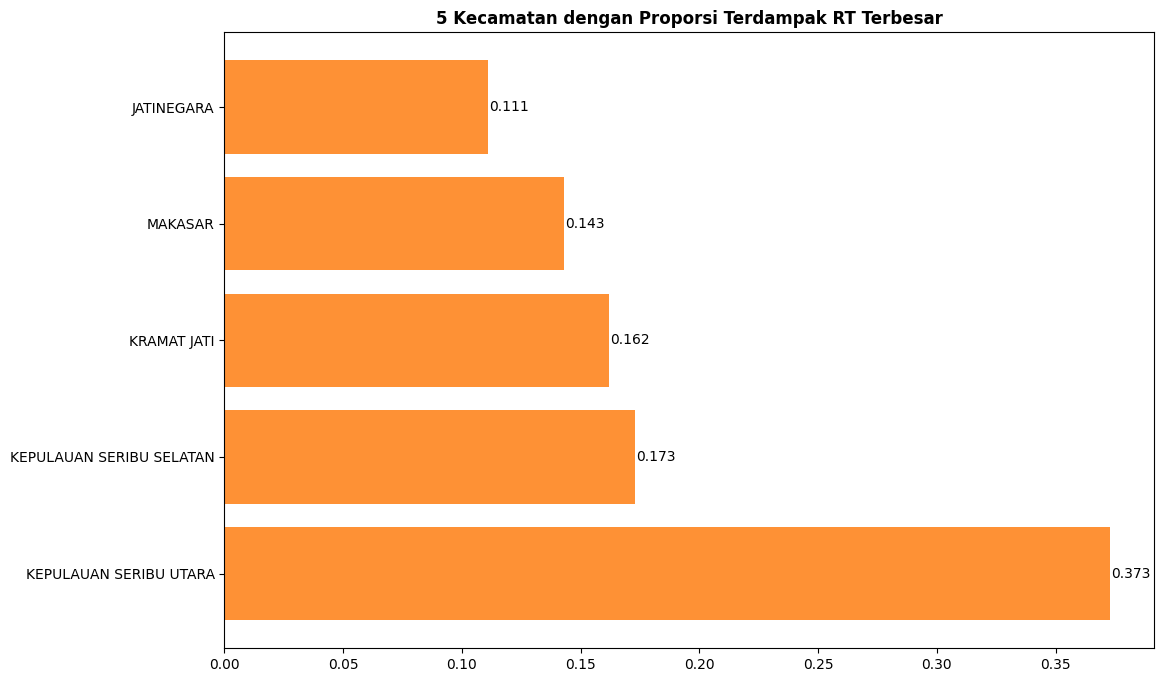

In [42]:
#Barplot Proporsi Terdampak RT
proporsi_rt = data_final[["kecamatan", "proporsi_terdampak_rt"]]

# Mengurutkan kecamatan berdasarkan proporsi terdampak rt secara menurun
proporsi_rt = proporsi_rt.sort_values('proporsi_terdampak_rt', ascending=False)
proporsi_rt_5 = proporsi_rt.iloc[:5,]
proporsi_rt_5["proporsi_terdampak_rt"] = proporsi_rt_5["proporsi_terdampak_rt"].round(decimals=3)

# Membuat visualisasi barh
plt.figure(figsize=(12, 8))  # Ukuran plot

# Menggambar barh untuk tiap kecamatan
plt.barh(proporsi_rt_5['kecamatan'], proporsi_rt_5['proporsi_terdampak_rt'], color="#FE9135")
plt.title("5 Kecamatan dengan Proporsi Terdampak RT Terbesar", fontweight="bold")

# Menambahkan label nilai di atas setiap barh
for i, v in enumerate(proporsi_rt_5['proporsi_terdampak_rt']):
    plt.text(v + 0.0005, i, str(v), ha='left', va='center')

<ipython-input-43-bd236c12d599>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporsi_kk_5["proporsi_terdampak_kk"] = proporsi_kk_5["proporsi_terdampak_kk"].round(decimals=3)


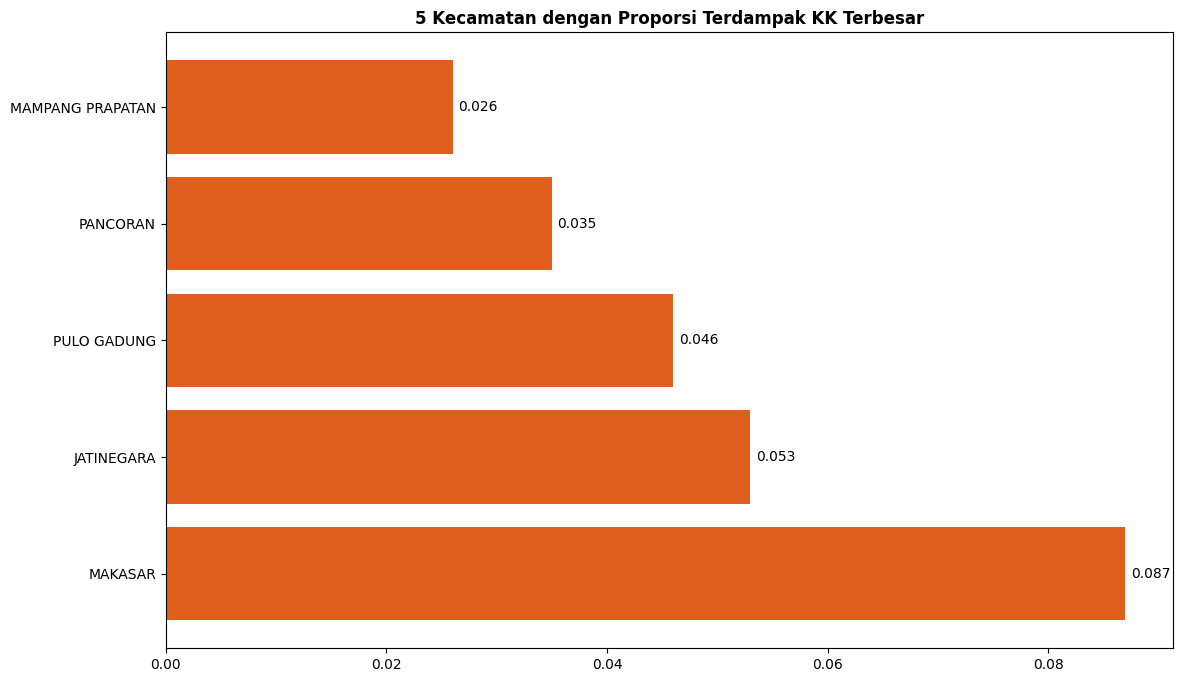

In [43]:
#Barplot Proporsi Terdampak KK
proporsi_kk = data_final[["kecamatan", "proporsi_terdampak_kk"]]

# Mengurutkan kecamatan berdasarkan proporsi terdampak kk secara menurun
proporsi_kk = proporsi_kk.sort_values('proporsi_terdampak_kk', ascending=False)
proporsi_kk_5 = proporsi_kk.iloc[:5,]
proporsi_kk_5["proporsi_terdampak_kk"] = proporsi_kk_5["proporsi_terdampak_kk"].round(decimals=3)

# Membuat visualisasi barh
plt.figure(figsize=(13, 8))  # Ukuran plot

# Menggambar barh untuk tiap kecamatan
plt.barh(proporsi_kk_5['kecamatan'], proporsi_kk_5['proporsi_terdampak_kk'], color="#E05F1D")
plt.title("5 Kecamatan dengan Proporsi Terdampak KK Terbesar", fontweight="bold")

# Menambahkan label nilai di atas setiap barh
for i, v in enumerate(proporsi_kk_5['proporsi_terdampak_kk']):
    plt.text(v + 0.0005, i, str(v), ha='left', va='center')

<ipython-input-44-2a533d2b0012>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporsi_jiwa_5["proporsi_terdampak_jiwa"] = proporsi_jiwa_5["proporsi_terdampak_jiwa"].round(decimals=3)


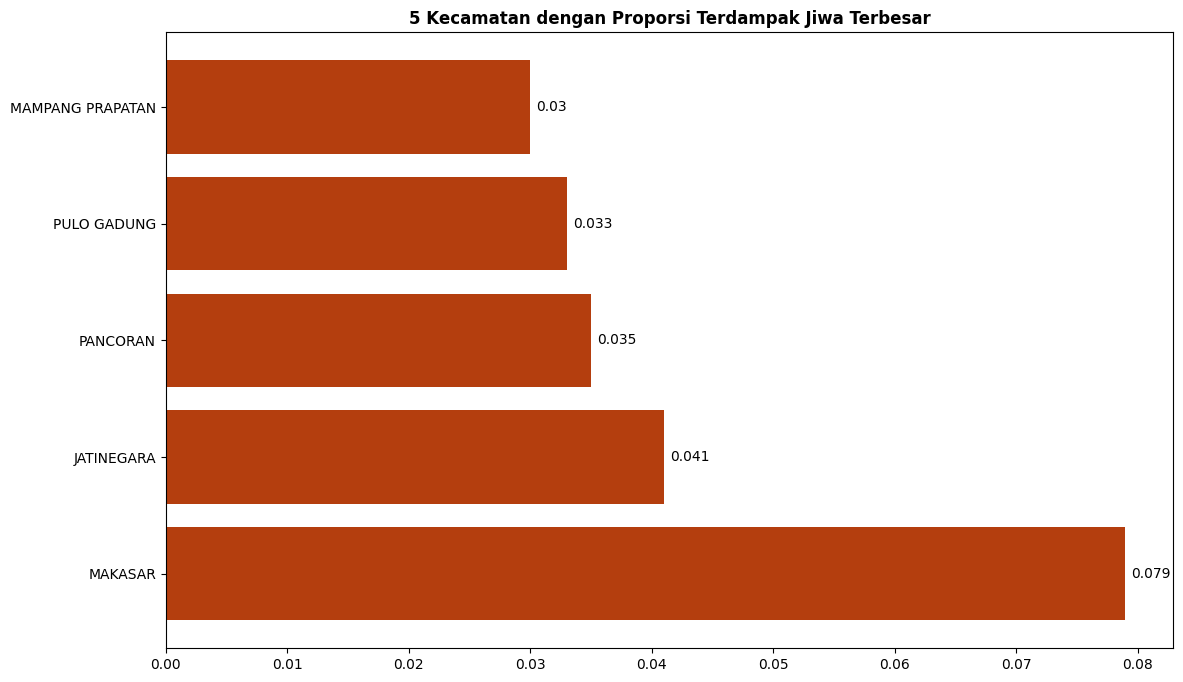

In [44]:
#Barplot Proporsi Terdampak Jiwa
proporsi_jiwa = data_final[["kecamatan", "proporsi_terdampak_jiwa"]]

# Mengurutkan kecamatan berdasarkan proporsi terdampak jiwa secara menurun
proporsi_jiwa = proporsi_jiwa.sort_values('proporsi_terdampak_jiwa', ascending=False)
proporsi_jiwa_5 = proporsi_jiwa.iloc[:5,]
proporsi_jiwa_5["proporsi_terdampak_jiwa"] = proporsi_jiwa_5["proporsi_terdampak_jiwa"].round(decimals=3)

# Membuat visualisasi barh
plt.figure(figsize=(13, 8))  # Ukuran plot

# Menggambar barh untuk tiap kecamatan
plt.barh(proporsi_jiwa_5['kecamatan'], proporsi_jiwa_5['proporsi_terdampak_jiwa'], color="#B43E0E")
plt.title("5 Kecamatan dengan Proporsi Terdampak Jiwa Terbesar", fontweight="bold")

# Menambahkan label nilai di atas setiap barh
for i, v in enumerate(proporsi_jiwa_5['proporsi_terdampak_jiwa']):
    plt.text(v + 0.0005, i, str(v), ha='left', va='center')

In [45]:
# Mengambil nilai dari variabel kota administrasi dan kecamatan dari dataset awal
data_kota_kec = df[["kota_administrasi", "kecamatan"]]
data_kota_kec.head()

,kota_administrasi,kecamatan
0,Jakarta Pusat,JOHAR BARU
1,Jakarta Pusat,KEMAYORAN
2,Jakarta Pusat,KEMAYORAN
3,Jakarta Pusat,SAWAH BESAR
4,Jakarta Pusat,TANAH ABANG


In [46]:
# Menambahkan nama kota administrasi pada dataset data_merged_kec
data_per_kota = pd.merge(data_kota_kec, data_merged_kec)
data_per_kota.drop_duplicates(inplace=True)
data_per_kota

,kota_administrasi,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,Jakarta Pusat,JOHAR BARU,6,7,35,140
5,Jakarta Pusat,KEMAYORAN,22,27,0,0
13,Jakarta Pusat,SAWAH BESAR,11,11,155,625
18,Jakarta Pusat,TANAH ABANG,17,55,587,2273
27,Jakarta Utara,CILINCING,47,81,1315,4380
47,Jakarta Utara,KELAPA GADING,27,27,117,481
53,Jakarta Utara,KOJA,18,21,22,192
62,Jakarta Utara,PENJARINGAN,20,79,322,1288
85,Jakarta Utara,PADEMANGAN,8,8,50,200
93,Jakarta Barat,CENGKARENG,63,111,3296,13210


In [47]:
# Menghilangkan kolom kecamatan
data_per_kota.drop(["kecamatan"], axis=1, inplace=True)
data_per_kota.head()

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,Jakarta Pusat,6,7,35,140
5,Jakarta Pusat,22,27,0,0
13,Jakarta Pusat,11,11,155,625
18,Jakarta Pusat,17,55,587,2273
27,Jakarta Utara,47,81,1315,4380


In [48]:
# Rata-rata jumlah terdampak RW, RT, KK, dan Jiwa Per Kecamatan di Tiap Kota Administrasi
data_rata = data_per_kota.groupby("kota_administrasi").mean().reset_index()
data_rata

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,Jakarta Barat,27.375000,41.500000,634.625000,2528.625000
1,Jakarta Pusat,9.500000,15.125000,97.125000,379.750000
2,Jakarta Selatan,19.300000,28.900000,572.200000,2320.000000
3,Jakarta Timur,30.300000,71.400000,1767.700000,5897.800000
4,Jakarta Utara,21.666667,37.666667,304.333333,1090.166667
5,Kepulauan Seribu,11.000000,18.500000,0.000000,0.000000


## Matriks Korelasi

<ipython-input-49-2f9b5b68a940>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_final.corr().round(2)


Text(0.5, 1.0, 'Matrix Correlation for Numeric Features ')

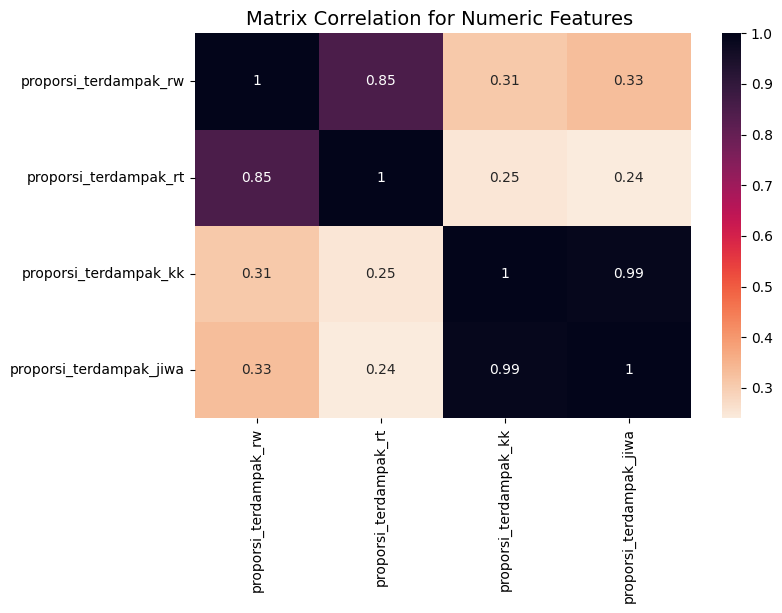

In [49]:
#Matriks Korelasi
plt.figure(figsize = (8,5))
correlation_matrix = data_final.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Matrix Correlation for Numeric Features ", size = 14)

Dari matriks korelasi di atas, beberapa variabel memiliki korelasi yang tinggi, yaitu variabel `proporsi_terdampak_rw` dengan `proporsi_terdampak_rt` yang memiliki korelasi 0.85, dan variabel `proporsi_terdampak_jiwa` dengan `proporsi_terdampak_kk` yang memiliki korelasi 0.99. Agar diperoleh model klasterisasi yang baik, maka perlu dilakukan pereduksian dimensi menggunakan Principal Component Analysis (PCA).

# Pereduksian Dimensi dengan PCA

In [50]:
# Menerapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_final[['proporsi_terdampak_rw' , 'proporsi_terdampak_rt' , 'proporsi_terdampak_kk', 'proporsi_terdampak_jiwa']])

# Mendapatkan loadings dari PCA
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['proporsi_terdampak_rw' , 'proporsi_terdampak_rt' , 'proporsi_terdampak_kk', 'proporsi_terdampak_jiwa'])

# Menampilkan loadings
print(loadings)

# Membuat DataFrame baru dari nilai PCA
data_reduction = pd.DataFrame({'Comp 1': X_pca[:, 0], 'Comp 2': X_pca[:, 1]})
data_reduction

                              PC1       PC2
proporsi_terdampak_rw    0.964991 -0.256498
proporsi_terdampak_rt    0.260107  0.962668
proporsi_terdampak_kk    0.024592 -0.052754
proporsi_terdampak_jiwa  0.023070 -0.068533


,Comp 1,Comp 2
0,0.085962,-0.015562
1,-0.097731,-0.012473
2,0.365657,-0.055456
3,-0.080317,-0.009828
4,0.169050,-0.029361
5,0.093480,0.006628
6,0.035661,0.013165
7,0.086960,0.014987
8,-0.338453,0.028373
9,0.060415,-0.040086


In [51]:
data_kecamatan = data_final[["kecamatan"]]
data_kecamatan

,kecamatan
0,CAKUNG
1,CEMPAKA PUTIH
2,CENGKARENG
3,CILANDAK
4,CILINCING
5,CIPAYUNG
6,CIRACAS
7,DUREN SAWIT
8,GAMBIR
9,GROGOL PETAMBURAN


In [52]:
# Menambahkan nama kecamatan pada data hasil PCA
data_pca = pd.concat([data_kecamatan, data_reduction], axis=1)
data_pca

,kecamatan,Comp 1,Comp 2
0,CAKUNG,0.085962,-0.015562
1,CEMPAKA PUTIH,-0.097731,-0.012473
2,CENGKARENG,0.365657,-0.055456
3,CILANDAK,-0.080317,-0.009828
4,CILINCING,0.169050,-0.029361
5,CIPAYUNG,0.093480,0.006628
6,CIRACAS,0.035661,0.013165
7,DUREN SAWIT,0.086960,0.014987
8,GAMBIR,-0.338453,0.028373
9,GROGOL PETAMBURAN,0.060415,-0.040086


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

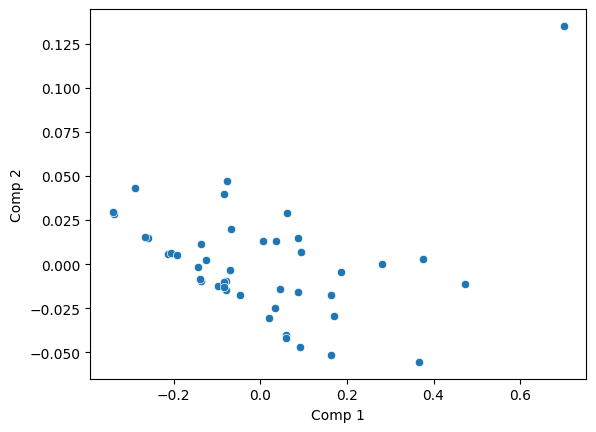

In [53]:
sns.scatterplot(data=data_pca, x="Comp 1", y="Comp 2")

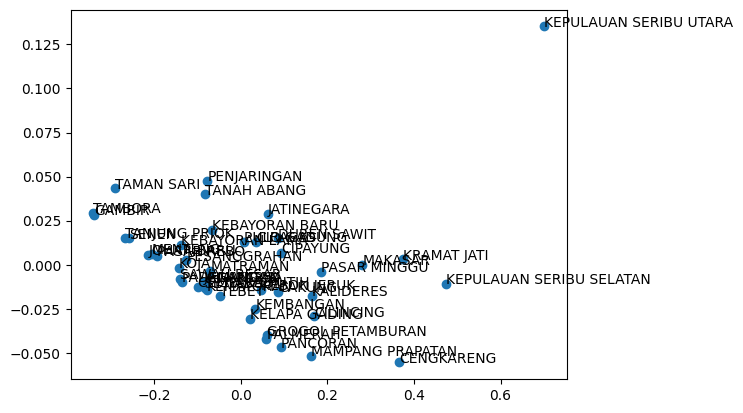

In [54]:
kec = data_pca["kecamatan"]
x=data_pca["Comp 1"]
y=data_pca["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

## EDA

In [55]:
# Menambahkan nama kota administrasi pada data hasil PCA
data_eda = pd.merge(data_kota_kec, data_pca)
data_eda.drop_duplicates(inplace=True)
data_eda

,kota_administrasi,kecamatan,Comp 1,Comp 2
0,Jakarta Pusat,JOHAR BARU,-0.213393,0.005794
5,Jakarta Pusat,KEMAYORAN,-0.078587,-0.014536
13,Jakarta Pusat,SAWAH BESAR,-0.139834,-0.008150
18,Jakarta Pusat,TANAH ABANG,-0.083582,0.039918
27,Jakarta Utara,CILINCING,0.169050,-0.029361
47,Jakarta Utara,KELAPA GADING,0.020769,-0.030650
53,Jakarta Utara,KOJA,-0.143564,-0.001711
62,Jakarta Utara,PENJARINGAN,-0.077511,0.047448
85,Jakarta Utara,PADEMANGAN,-0.136278,-0.009669
93,Jakarta Barat,CENGKARENG,0.365657,-0.055456


### Jakarta Pusat

In [56]:
jakarta_pusat = data_eda[data_eda["kota_administrasi"]=="Jakarta Pusat"].reset_index()
jakarta_pusat

,index,kota_administrasi,kecamatan,Comp 1,Comp 2
0,0,Jakarta Pusat,JOHAR BARU,-0.213393,0.005794
1,5,Jakarta Pusat,KEMAYORAN,-0.078587,-0.014536
2,13,Jakarta Pusat,SAWAH BESAR,-0.139834,-0.008150
3,18,Jakarta Pusat,TANAH ABANG,-0.083582,0.039918
4,882,Jakarta Pusat,SENEN,-0.258378,0.015011
5,885,Jakarta Pusat,MENTENG,-0.205228,0.006051
6,887,Jakarta Pusat,CEMPAKA PUTIH,-0.097731,-0.012473
7,891,Jakarta Pusat,GAMBIR,-0.338453,0.028373


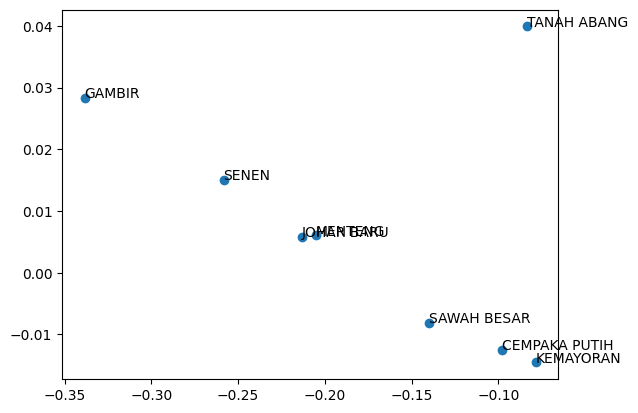

In [57]:
kec = jakarta_pusat["kecamatan"]
x=jakarta_pusat["Comp 1"]
y=jakarta_pusat["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Jakarta Pusat adalah Tanah Abang.

### Jakarta Utara

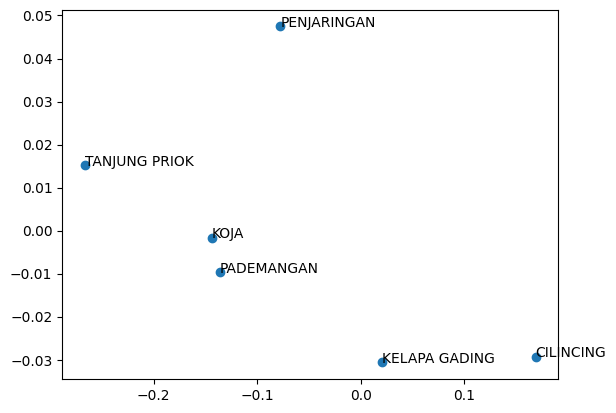

In [58]:
jakarta_utara = data_eda[data_eda["kota_administrasi"]=="Jakarta Utara"].reset_index()

kec = jakarta_utara["kecamatan"]
x=jakarta_utara["Comp 1"]
y=jakarta_utara["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Jakarta Utara adalah Cilincing.

### Jakarta Barat

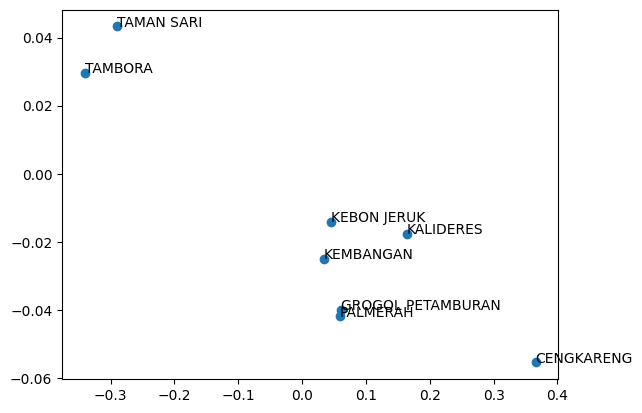

In [59]:
jakarta_barat = data_eda[data_eda["kota_administrasi"]=="Jakarta Barat"].reset_index()

kec = jakarta_barat["kecamatan"]
x=jakarta_barat["Comp 1"]
y=jakarta_barat["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Jakarta Barat adalah Cengkareng.

### Jakarta Selatan

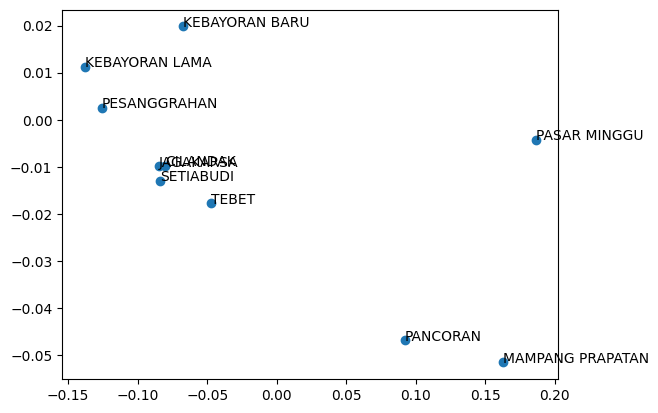

In [60]:
jakarta_selatan = data_eda[data_eda["kota_administrasi"]=="Jakarta Selatan"].reset_index()

kec = jakarta_selatan["kecamatan"]
x=jakarta_selatan["Comp 1"]
y=jakarta_selatan["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Jakarta Selatan adalah Pasar Minggu.

### Jakarta Timur

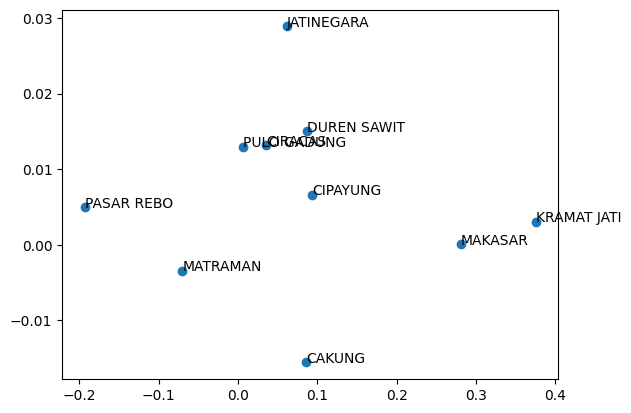

In [61]:
jakarta_timur = data_eda[data_eda["kota_administrasi"]=="Jakarta Timur"].reset_index()

kec = jakarta_timur["kecamatan"]
x=jakarta_timur["Comp 1"]
y=jakarta_timur["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Jakarta Timur adalah Kramat Jati.

### Kepulauan Seribu

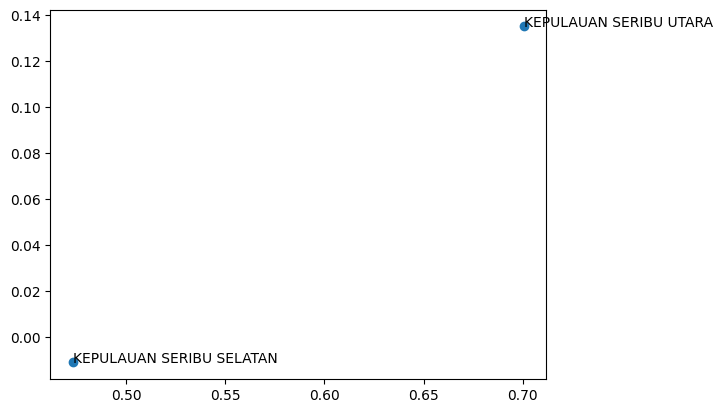

In [62]:
kep_ser = data_eda[data_eda["kota_administrasi"]=="Kepulauan Seribu"].reset_index()

kec = kep_ser["kecamatan"]
x=kep_ser["Comp 1"]
y=kep_ser["Comp 2"]
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(kec[i], (x[i], y[i]))

# adjusting the scale of the axes
plt.show()

Dari plot di atas, dapat diperoleh informasi bahwa kecamatan paling terdampak di Kepulauan Seribu adalah Kepulauan Seribu Utara.

# Klasterisasi Agglomerative

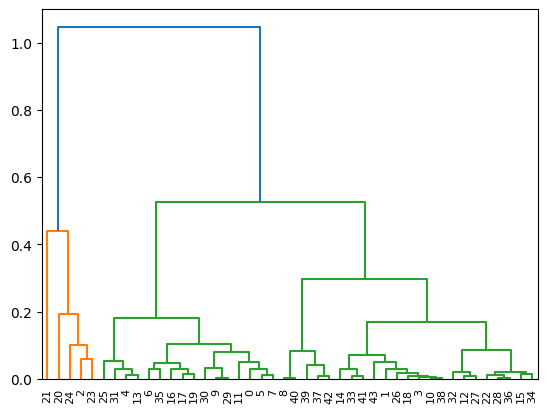

In [63]:
linkage_data = linkage(data_reduction, method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Dari dendogram di atas, terlihat bahwa dapat dibentuk tiga klaster.

# Klasterisasi dengan K-Means

In [64]:
from sklearn.cluster import KMeans

In [65]:
data_cluster1 = data_pca[["Comp 1", "Comp 2"]]
data_cluster1.head()

,Comp 1,Comp 2
0,0.085962,-0.015562
1,-0.097731,-0.012473
2,0.365657,-0.055456
3,-0.080317,-0.009828
4,0.169050,-0.029361


## Mencari Jumlah Kluster Optimal

### 1.Elbow Method

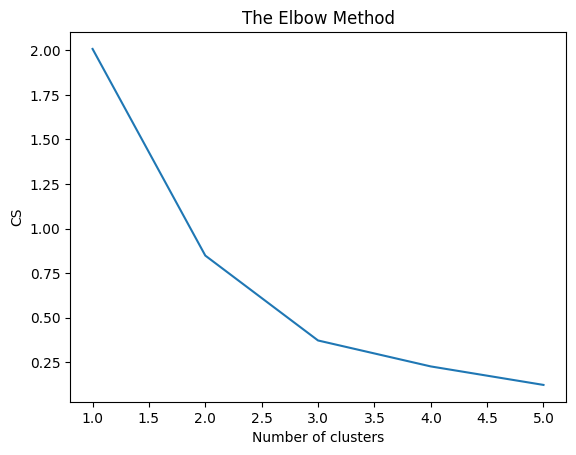

In [66]:
# Elbow Method
cs = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 5, random_state = 0)
    kmeans.fit(data_cluster1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 6), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### 2.Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


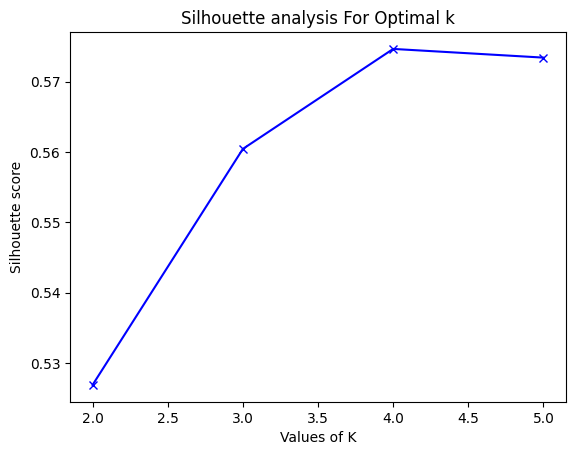

In [67]:
range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_cluster1)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(data_cluster1, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

## Klasterisasi

### Untuk n=4

In [68]:
kmeans_model = KMeans(n_clusters = 4)
clusters = kmeans_model.fit_predict(data_cluster1)
data_cluster1.insert(data_cluster1.columns.get_loc("Comp 1"), "Cluster", clusters)
data_cluster1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Comp 1,Comp 2
0,3,0.085962,-0.015562
1,0,-0.097731,-0.012473
2,1,0.365657,-0.055456
3,0,-0.080317,-0.009828
4,3,0.169050,-0.029361


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

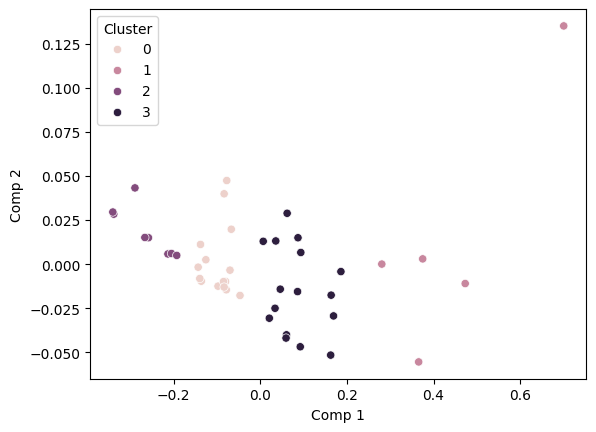

In [69]:
sns.scatterplot(data=data_cluster1, x="Comp 1", y="Comp 2", hue="Cluster")

### Untuk n=3

In [70]:
data_cluster2 = data_pca[["Comp 1", "Comp 2"]]
data_cluster2

,Comp 1,Comp 2
0,0.085962,-0.015562
1,-0.097731,-0.012473
2,0.365657,-0.055456
3,-0.080317,-0.009828
4,0.169050,-0.029361
5,0.093480,0.006628
6,0.035661,0.013165
7,0.086960,0.014987
8,-0.338453,0.028373
9,0.060415,-0.040086


In [71]:
kmeans_model3 = KMeans(n_clusters = 3)
clusters3 = kmeans_model3.fit_predict(data_cluster2)
data_cluster2.insert(data_cluster2.columns.get_loc("Comp 1"), "Cluster", clusters3)
data_cluster2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Comp 1,Comp 2
0,2,0.085962,-0.015562
1,0,-0.097731,-0.012473
2,1,0.365657,-0.055456
3,0,-0.080317,-0.009828
4,2,0.169050,-0.029361


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

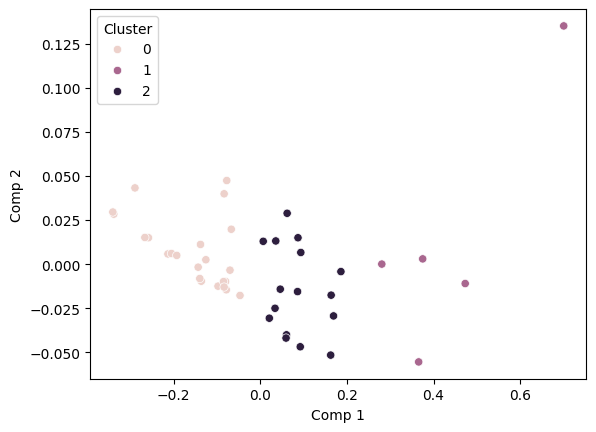

In [72]:
sns.scatterplot(data=data_cluster2, x="Comp 1", y="Comp 2", hue="Cluster")

## Evaluasi Kluster

In [73]:
from sklearn.metrics import adjusted_rand_score

In [74]:
from sklearn.metrics import davies_bouldin_score

In [75]:
label_4_kmeans = kmeans_model.fit_predict(data_cluster1)
label_3_kmeans = kmeans_model3.fit_predict(data_cluster2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
db_4_kmeans = davies_bouldin_score(data_cluster1, label_4_kmeans)
db_3_kmeans = davies_bouldin_score(data_cluster2, label_3_kmeans)
print("DB Index 4 cluster: ", db_4_kmeans)
print("DB Index 3 cluster: ", db_3_kmeans)

DB Index 4 cluster:  0.13355459263270789
DB Index 3 cluster:  0.17799616199673549


# Klasterisasi dengan K-Medoids

In [77]:
!pip install scikit-learn-extra

In [78]:
from sklearn_extra.cluster import KMedoids

In [79]:
data_cluster3 = data_pca[["Comp 1", "Comp 2"]]
data_cluster3

,Comp 1,Comp 2
0,0.085962,-0.015562
1,-0.097731,-0.012473
2,0.365657,-0.055456
3,-0.080317,-0.009828
4,0.169050,-0.029361
5,0.093480,0.006628
6,0.035661,0.013165
7,0.086960,0.014987
8,-0.338453,0.028373
9,0.060415,-0.040086


## Mencari Jumlah Klaster Optimal

### 1.Elbow Method

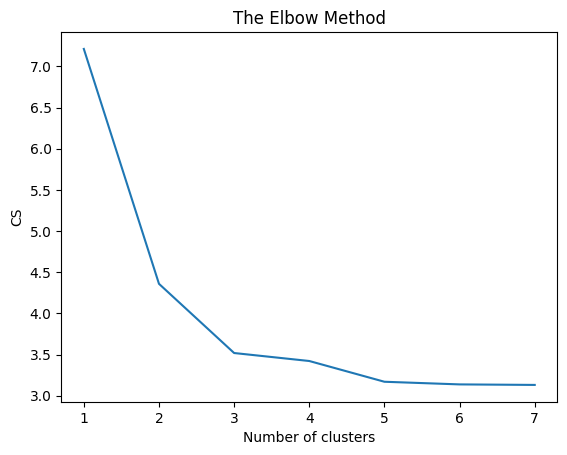

In [80]:
# Elbow Method
cs = []
for i in range(1, 8):
    kmedoids = KMedoids(n_clusters = i)
    kmedoids.fit(data_cluster3)
    cs.append(kmedoids.inertia_)
plt.plot(range(1, 8), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### 2.Silhouette Method

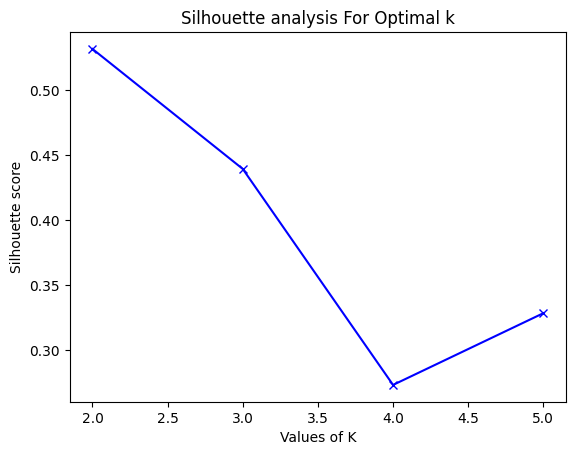

In [81]:
range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmedoids = KMedoids(n_clusters=num_clusters)
 kmedoids.fit(data_cluster3)
 cluster_labels = kmedoids.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(data_cluster3, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

## Klasterisasi

### Untuk n=2

In [82]:
kmedoids2 = KMedoids(n_clusters=2).fit(data_cluster3)

In [83]:
kmedoids2.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
label = pd.DataFrame(kmedoids2.labels_)
label.columns = ["cluster"]
label

,cluster
0,1
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,0
9,1


In [85]:
data_kmedoids = pd.concat([data_cluster3, label], axis=1)
data_kmedoids

,Comp 1,Comp 2,cluster
0,0.085962,-0.015562,1
1,-0.097731,-0.012473,0
2,0.365657,-0.055456,1
3,-0.080317,-0.009828,0
4,0.169050,-0.029361,1
5,0.093480,0.006628,1
6,0.035661,0.013165,1
7,0.086960,0.014987,1
8,-0.338453,0.028373,0
9,0.060415,-0.040086,1


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

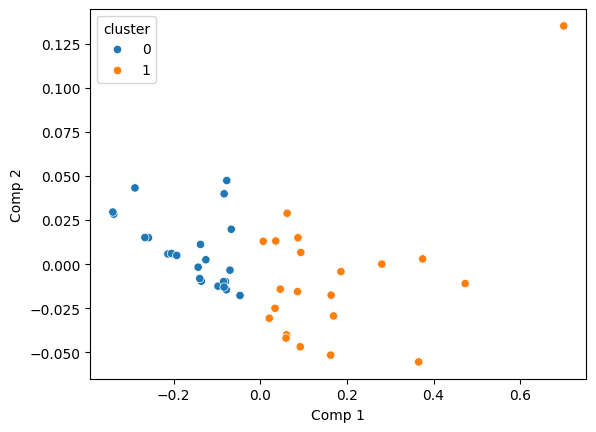

In [86]:
sns.scatterplot(data_kmedoids, x="Comp 1", y="Comp 2", hue="cluster")

### Untuk n=3

In [87]:
data_cluster4 = data_pca[["Comp 1", "Comp 2"]]

In [88]:
kmedoids3 = KMedoids(n_clusters=3).fit(data_cluster4)

In [89]:
label = pd.DataFrame(kmedoids3.labels_)
label.columns = ["cluster"]
label

,cluster
0,1
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,2
9,1


In [90]:
data_kmedoids3 = pd.concat([data_cluster4, label], axis=1)
data_kmedoids3

,Comp 1,Comp 2,cluster
0,0.085962,-0.015562,1
1,-0.097731,-0.012473,0
2,0.365657,-0.055456,1
3,-0.080317,-0.009828,0
4,0.169050,-0.029361,1
5,0.093480,0.006628,1
6,0.035661,0.013165,1
7,0.086960,0.014987,1
8,-0.338453,0.028373,2
9,0.060415,-0.040086,1


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

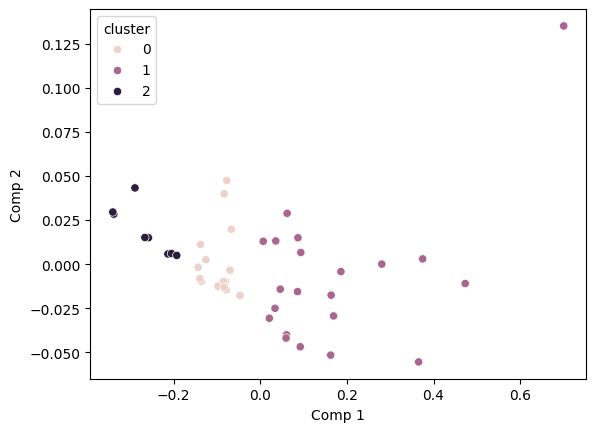

In [91]:
sns.scatterplot(data=data_kmedoids3, x="Comp 1", y="Comp 2", hue="cluster")

## Evaluasi Kluster

In [92]:
label_2 = kmedoids2.labels_
label_3 = kmedoids3.labels_

In [93]:
db_index_2_kmedoids = davies_bouldin_score(data_cluster3, label_2)
db_index_3_kmedoids = davies_bouldin_score(data_cluster4, label_3)
print("DB Index 2 cluster: ", db_index_2_kmedoids)
print("DB Index 3 cluster: ", db_index_3_kmedoids)

DB Index 2 cluster:  0.658815590233682
DB Index 3 cluster:  0.5861899034385294


In [94]:
data_eval = [["K-Means 3 Klaster", db_3_kmeans],["K-Means 4 Klaster", db_4_kmeans],
              ["K-Medoids 2 Klaster", db_index_2_kmedoids], ["K-Medoids 3 Klaster", db_index_3_kmedoids]]
evaluasi = pd.DataFrame(data_eval, columns=['Metode', 'Nilai DB'])
evaluasi

,Metode,Nilai DB
0,K-Means 3 Klaster,0.177996
1,K-Means 4 Klaster,0.133555
2,K-Medoids 2 Klaster,0.658816
3,K-Medoids 3 Klaster,0.586190


# Hasil Clustering

Berdasarkan hasil evaluasi, metode K-Means 4 Klaster memiliki indeks DB paling rendah. Dengan demikian, hasil klasterisasi yang terbaik adalah klasterisasi K-Means dengan jumlah klaster sebanyak 4.

In [95]:
data_cluster1.head()

,Cluster,Comp 1,Comp 2
0,3,0.085962,-0.015562
1,0,-0.097731,-0.012473
2,1,0.365657,-0.055456
3,0,-0.080317,-0.009828
4,3,0.169050,-0.029361


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

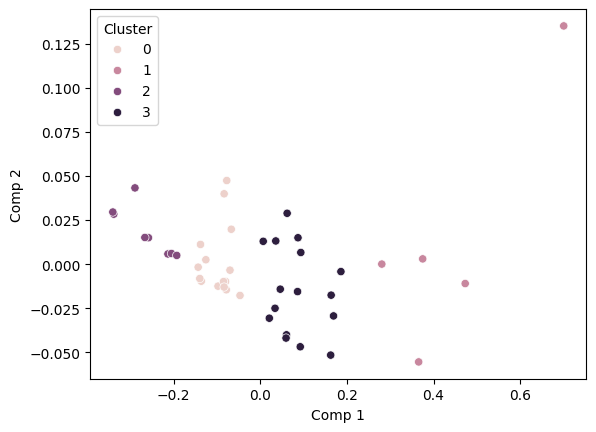

In [96]:
sns.scatterplot(data=data_cluster1, x="Comp 1", y="Comp 2", hue="Cluster")

In [97]:
nama_kecamatan = data_pca[["kecamatan"]]
nama_kecamatan

,kecamatan
0,CAKUNG
1,CEMPAKA PUTIH
2,CENGKARENG
3,CILANDAK
4,CILINCING
5,CIPAYUNG
6,CIRACAS
7,DUREN SAWIT
8,GAMBIR
9,GROGOL PETAMBURAN


In [98]:
# Menambahkan nama kecamatan pada hasil klasterisasi
hasil_cluster = pd.concat([data_cluster1, nama_kecamatan], axis=1)
hasil_cluster

,Cluster,Comp 1,Comp 2,kecamatan
0,3,0.085962,-0.015562,CAKUNG
1,0,-0.097731,-0.012473,CEMPAKA PUTIH
2,1,0.365657,-0.055456,CENGKARENG
3,0,-0.080317,-0.009828,CILANDAK
4,3,0.169050,-0.029361,CILINCING
5,3,0.093480,0.006628,CIPAYUNG
6,3,0.035661,0.013165,CIRACAS
7,3,0.086960,0.014987,DUREN SAWIT
8,2,-0.338453,0.028373,GAMBIR
9,3,0.060415,-0.040086,GROGOL PETAMBURAN


In [99]:
label_cluster = hasil_cluster[["Cluster"]]
label_cluster

,Cluster
0,3
1,0
2,1
3,0
4,3
5,3
6,3
7,3
8,2
9,3


## Profiling Hasil Clustering

In [101]:
data_hasil_clustering = pd.concat([label_cluster, data_final], axis=1)
data_hasil_clustering

,Cluster,kecamatan,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
0,3,CAKUNG,0.444444,0.069767,0.008546,0.007712
1,0,CEMPAKA PUTIH,0.266667,0.024590,0.000000,0.000000
2,1,CENGKARENG,0.724138,0.104717,0.022875,0.022920
3,0,CILANDAK,0.282609,0.031915,0.002612,0.002621
4,3,CILINCING,0.528090,0.078185,0.012995,0.010821
5,3,CIPAYUNG,0.446429,0.092520,0.001763,0.001322
6,3,CIRACAS,0.387755,0.085386,0.016701,0.013824
7,3,DUREN SAWIT,0.437500,0.099548,0.006675,0.007707
8,2,GAMBIR,0.023256,0.002165,0.000000,0.000000
9,3,GROGOL PETAMBURAN,0.426667,0.038724,0.001481,0.001485


In [102]:
# Menghilangkan kolom kecamatan
data_hasil = data_hasil_clustering.drop(["kecamatan"], axis=1)
data_hasil

,Cluster,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
0,3,0.444444,0.069767,0.008546,0.007712
1,0,0.266667,0.024590,0.000000,0.000000
2,1,0.724138,0.104717,0.022875,0.022920
3,0,0.282609,0.031915,0.002612,0.002621
4,3,0.528090,0.078185,0.012995,0.010821
5,3,0.446429,0.092520,0.001763,0.001322
6,3,0.387755,0.085386,0.016701,0.013824
7,3,0.437500,0.099548,0.006675,0.007707
8,2,0.023256,0.002165,0.000000,0.000000
9,3,0.426667,0.038724,0.001481,0.001485


In [103]:
data_profiling_prop = data_hasil.groupby('Cluster').mean().reset_index()
data_profiling_prop

,Cluster,proporsi_terdampak_rw,proporsi_terdampak_rt,proporsi_terdampak_kk,proporsi_terdampak_jiwa
0,0,0.263451,0.038702,0.004764,0.004683
1,1,0.776742,0.191297,0.024270,0.022556
2,2,0.098598,0.012050,0.000415,0.000292
3,3,0.443202,0.070711,0.014741,0.013017


In [104]:
data_hasil_clustering2 = pd.concat([label_cluster, data_merged_kec], axis=1)
data_hasil_clustering3 = data_hasil_clustering2.drop(["kecamatan"], axis=1)
data_hasil_clustering3.head()

,Cluster,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,3,40,72,1189,4292
1,0,8,9,0,0
2,1,63,111,3296,13210
3,0,13,15,147,590
4,3,47,81,1315,4380


In [105]:
data_profiling_jumlah = data_hasil_clustering3.groupby('Cluster').mean().reset_index()
data_profiling_jumlah

,Cluster,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,0,15.933333,27.333333,288.333333,1134.266667
1,1,32.800000,66.600000,1736.800000,6580.000000
2,2,5.375000,7.625000,20.375000,55.875000
3,3,31.062500,57.187500,1119.187500,3851.562500


Cluster 0: Level 2\
Cluster 1: Level 4\
Cluster 2: Level 1\
Cluster 3: Level 3

## Penyesuaian Level Cluster

In [106]:
hasil_cluster.head()

,Cluster,Comp 1,Comp 2,kecamatan
0,3,0.085962,-0.015562,CAKUNG
1,0,-0.097731,-0.012473,CEMPAKA PUTIH
2,1,0.365657,-0.055456,CENGKARENG
3,0,-0.080317,-0.009828,CILANDAK
4,3,0.169050,-0.029361,CILINCING


In [107]:
hasil_cluster.loc[hasil_cluster["Cluster"] == 0, "Cluster"] = "Level 2"
hasil_cluster.loc[hasil_cluster["Cluster"] == 1, "Cluster"] = "Level 4"
hasil_cluster.loc[hasil_cluster["Cluster"] == 2, "Cluster"] = "Level 1"
hasil_cluster.loc[hasil_cluster["Cluster"] == 3, "Cluster"] = "Level 3"
hasil_cluster

,Cluster,Comp 1,Comp 2,kecamatan
0,Level 3,0.085962,-0.015562,CAKUNG
1,Level 2,-0.097731,-0.012473,CEMPAKA PUTIH
2,Level 4,0.365657,-0.055456,CENGKARENG
3,Level 2,-0.080317,-0.009828,CILANDAK
4,Level 3,0.169050,-0.029361,CILINCING
5,Level 3,0.093480,0.006628,CIPAYUNG
6,Level 3,0.035661,0.013165,CIRACAS
7,Level 3,0.086960,0.014987,DUREN SAWIT
8,Level 1,-0.338453,0.028373,GAMBIR
9,Level 3,0.060415,-0.040086,GROGOL PETAMBURAN


In [108]:
hasil_cluster.loc[hasil_cluster["Cluster"] == "Level 1", "Cluster"] = 1
hasil_cluster.loc[hasil_cluster["Cluster"] == "Level 2", "Cluster"] = 2
hasil_cluster.loc[hasil_cluster["Cluster"] == "Level 3", "Cluster"] = 3
hasil_cluster.loc[hasil_cluster["Cluster"] == "Level 4", "Cluster"] = 4
hasil_cluster

,Cluster,Comp 1,Comp 2,kecamatan
0,3,0.085962,-0.015562,CAKUNG
1,2,-0.097731,-0.012473,CEMPAKA PUTIH
2,4,0.365657,-0.055456,CENGKARENG
3,2,-0.080317,-0.009828,CILANDAK
4,3,0.169050,-0.029361,CILINCING
5,3,0.093480,0.006628,CIPAYUNG
6,3,0.035661,0.013165,CIRACAS
7,3,0.086960,0.014987,DUREN SAWIT
8,1,-0.338453,0.028373,GAMBIR
9,3,0.060415,-0.040086,GROGOL PETAMBURAN


In [109]:
data_klasterisasi = hasil_cluster[["Cluster", "kecamatan"]]
data_klasterisasi

,Cluster,kecamatan
0,3,CAKUNG
1,2,CEMPAKA PUTIH
2,4,CENGKARENG
3,2,CILANDAK
4,3,CILINCING
5,3,CIPAYUNG
6,3,CIRACAS
7,3,DUREN SAWIT
8,1,GAMBIR
9,3,GROGOL PETAMBURAN


In [110]:
# Menyimpan Hasil Kalsterisasi
data_klasterisasi.to_excel("Hasil Clustering.xlsx", index=False)

<Axes: xlabel='Comp 1', ylabel='Comp 2'>

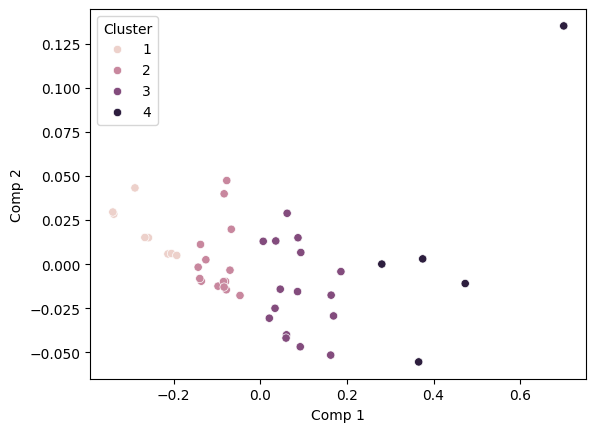

In [111]:
sns.scatterplot(data=hasil_cluster, x="Comp 1", y="Comp 2", hue="Cluster")

In [112]:
cluster_1 = hasil_cluster[hasil_cluster["Cluster"]==1]
cluster_2 = hasil_cluster[hasil_cluster["Cluster"]==2]
cluster_3 = hasil_cluster[hasil_cluster["Cluster"]==3]
cluster_4 = hasil_cluster[hasil_cluster["Cluster"]==4]

In [113]:
hasil_clustering = pd.concat([cluster_1, cluster_2, cluster_3, cluster_4], axis=0)
hasil_clustering

,Cluster,Comp 1,Comp 2,kecamatan
8,1,-0.338453,0.028373,GAMBIR
12,1,-0.213393,0.005794,JOHAR BARU
27,1,-0.205228,0.006051,MENTENG
32,1,-0.193038,0.004970,PASAR REBO
37,1,-0.258378,0.015011,SENEN
39,1,-0.289531,0.043261,TAMAN SARI
40,1,-0.340633,0.029577,TAMBORA
42,1,-0.266630,0.015141,TANJUNG PRIOK
1,2,-0.097731,-0.012473,CEMPAKA PUTIH
3,2,-0.080317,-0.009828,CILANDAK


In [114]:
label2 = hasil_cluster[["Cluster"]]
label2.head()

,Cluster
0,3
1,2
2,4
3,2
4,3


In [116]:
data_profiling_fix = pd.concat([data_merged_kec, label2], axis=1)
data_profiling_fix

,kecamatan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,Cluster
0,CAKUNG,40,72,1189,4292,3
1,CEMPAKA PUTIH,8,9,0,0,2
2,CENGKARENG,63,111,3296,13210,4
3,CILANDAK,13,15,147,590,2
4,CILINCING,47,81,1315,4380,3
5,CIPAYUNG,25,47,125,375,3
6,CIRACAS,19,52,1386,4589,3
7,DUREN SAWIT,42,110,718,3316,3
8,GAMBIR,1,1,0,0,1
9,GROGOL PETAMBURAN,32,34,94,377,3


In [117]:
untuk_profiling = data_profiling_fix.drop(["kecamatan"], axis=1)
untuk_profiling.head()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,Cluster
0,40,72,1189,4292,3
1,8,9,0,0,2
2,63,111,3296,13210,4
3,13,15,147,590,2
4,47,81,1315,4380,3


In [118]:
hasil_profiling_fix = untuk_profiling.groupby("Cluster").mean().reset_index()
hasil_profiling_fix

,Cluster,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa
0,1,5.375000,7.625000,20.375000,55.875000
1,2,15.933333,27.333333,288.333333,1134.266667
2,3,31.062500,57.187500,1119.187500,3851.562500
3,4,32.800000,66.600000,1736.800000,6580.000000
